In [18]:
import numpy as np
import cv2 as cv
import PIL
import glob
import os
import matplotlib.pyplot as plt

In [6]:
os.getcwd()

'C:\\Users\\Hawau Toyin\\Downloads\\test\\capsule\\crack'

In [11]:
# Get all Crack image locations
files = glob.glob('C:\\Users\\Hawau Toyin\\Downloads\\test\\capsule\\crack/*mask.png')

In [46]:
# Import good image
good = cv.imread('C:\\Users\\Hawau Toyin\\Downloads/test/capsule/crack/MicrosoftTeams-image (2).png')

In [51]:
cracks = files[:15]

In [16]:
image = cv.imread(cracks[0])

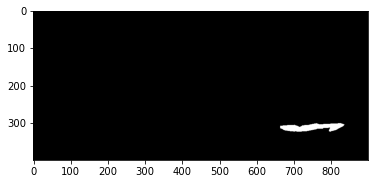

In [61]:
plt.imshow(image[300:700, 50:950])

In [52]:
import random
# Get random index for crack images
randomlist = []
for i in range(0,15):
    n = random.randint(1,90)
    randomlist.append(n)

In [53]:
randomlist

[40, 50, 83, 35, 25, 10, 3, 77, 26, 14, 38, 1, 39, 87, 52]

In [56]:
# Generate duplicated list of good dataset and add input image format of 15 cracks to get train set (150)
i = 0
train = []
for x in range(0,150):
    if x in randomlist:
        train.append(cv.imread(cracks[i]))
        i=i+1
    else:
        train.append(good)

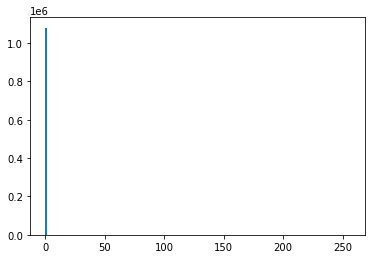

In [64]:
# Get color hist for cropped good image
plt.hist(good[300:700, 50:950].ravel(),256,[0,256])
plt.show()

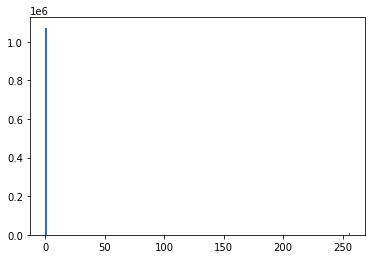

In [62]:
# Get color hist for cropped crack 1 image
plt.hist(image[300:700, 50:950].ravel(),256,[0,256])
plt.show()

In [65]:
hist = cv.calcHist([image[300:700, 50:950]],[0],None,[256],[0,256])

In [68]:
hist = cv.normalize(hist, hist).flatten()

(array([255.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([0.        , 0.09999757, 0.19999513, 0.2999927 , 0.39999026,
        0.49998784, 0.5999854 , 0.699983  , 0.7999805 , 0.8999781 ,
        0.9999757 ], dtype=float32),
 <BarContainer object of 10 artists>)

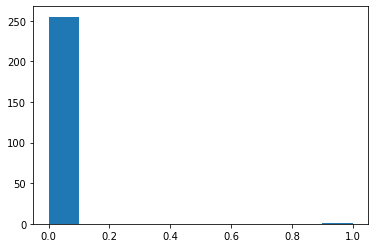

In [69]:
plt.hist(hist)

In [71]:
# Function to quantify image based on color distribution
def quantify_image(image):
#     get hist for BnW image
    hist = cv.calcHist([image[300:700, 50:950]],[0],None,[256],[0,256])  
    hist = cv.normalize(hist, hist).flatten()    
    return hist

def create_train(imagelist):
    
    data = []
    
    for image in imagelist:
        # quantify the image and update the data list
        features = quantify_image(image)
        data.append(features)
    
    return np.array(data)

In [72]:
X = create_train(train)

In [74]:
from sklearn.ensemble import IsolationForest

In [76]:
print("[INFO] fitting anomaly detection model...")
model = IsolationForest(n_estimators=100, contamination=0.1,
    random_state=42)
model.fit(X)

[INFO] fitting anomaly detection model...


IsolationForest(contamination=0.1, random_state=42)

In [121]:
im = cv.imread('C:\\Users\\Hawau Toyin\\Downloads/test/capsule/crack/001.png')

In [144]:
def get_contours(mask):
    imgray = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)
    ret, thresh = cv2.threshold(imgray, 127, 255, 0)
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
    return contours

In [153]:
def predict(mask: np.array, image: np.array):
    features = quantify_image(mask)
    preds = model.predict([features])[0]
    label = "Anomaly" if preds == -1 else "Good"
    color = (255, 0, 0) if preds == -1 else (0, 255, 0)
    if label == "Anomaly":
        contours = get_contours(mask)
        image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
        image = cv.drawContours(image, contours, -1, (255, 0, 0), 3)
        image = cv.putText(image, label, (10,  70), cv.FONT_HERSHEY_SIMPLEX,1.5, color, 5)
        return image
    image =  cv.putText(image, label, (10,  70), cv.FONT_HERSHEY_SIMPLEX,1.5, color, 5)
    return image

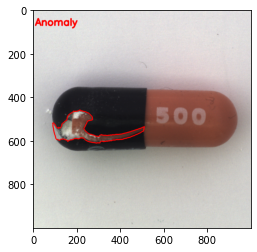

In [154]:
plt.imshow(predict(cv.imread(files[1]), im))